# World CAPE Ratio

References
* https://www.advisorperspectives.com/articles/2020/07/20/the-remarkable-accuracy-of-cape-as-a-predictor-of-returns-1
* https://seekingalpha.com/article/4257007-this-strategy-tripled-s-and-p-500-over-25-years
* https://mebfaber.com/2019/01/06/you-would-have-missed-961-in-gains-using-the-cape-ratio-and-thats-a-good-thing/
* https://www.morningstar.com/articles/993648/maybe-theres-something-to-the-shiller-cape-ratio-after-all
* https://siblisresearch.com/data/cape-ratios-by-country/
* https://www.lynalden.com/shiller-pe-cape-ratio/
* https://investerarfysikern.se/wp-content/uploads/2021/11/2014_02_CAPE_Predicting_Stock_Market_Returns.pdf
* https://medium.datadriveninvestor.com/cape-ratio-are-you-using-this-macro-indicator-to-refine-your-investment-choices-33e17852ec12
* https://www.nasdaq.com/articles/predicting-stock-market-returns-using-shiller-cape-and-pb-2016-07-08
* https://twitter.com/haditaheri/status/1296542246355865601

In [1]:
import pandas as pd

Firstly we need do get historical CAPE from: https://indices.barclays/IM/21/en/indices/static/historic-cape.app

In [3]:
df_cape = pd.read_csv('Historic-cape-ratios.csv')

In [6]:
df_cape.tail()

,Date,Australia,Brazil,Canada,China,Europe,France,Germany,Hong Kong,Italy,...,Russia,Singapore,South Africa,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA
474,30/06/2021,24.01,21.66,25.99,19.18,23.90,27.36,22.74,19.74,24.84,...,10.60,16.43,19.15,17.06,25.34,31.35,32.32,7.70,17.08,38.46
475,30/07/2021,24.24,20.59,26.38,16.54,24.23,28.14,22.72,19.44,26.67,...,10.69,16.83,18.87,17.23,26.20,31.33,31.30,7.80,17.10,38.62
476,31/08/2021,24.41,18.57,26.05,16.18,24.50,28.02,22.56,19.13,25.04,...,11.08,16.35,18.31,17.01,25.58,31.94,31.59,8.10,17.58,38.91
477,30/09/2021,23.41,17.17,25.06,15.37,23.57,26.91,21.66,18.03,24.69,...,11.70,16.48,17.74,16.77,24.08,29.80,30.39,7.52,17.29,37.11
478,29/10/2021,23.21,16.16,26.32,15.87,24.32,28.48,22.33,18.73,25.39,...,11.83,16.92,17.93,17.23,24.66,31.06,30.26,8.13,17.45,39.08


In [14]:
last_month = df_cape.tail(1).T.drop('Date')
last_month.shape

(26, 1)

In [20]:
last_month.describe()

,478
count,26.00
unique,26.00
top,28.48
freq,1.00


In [30]:
last_month[last_month[478] < last_month[478].quantile(.30)]

,478
Brazil,16.16
China,15.87
Korea,17.03
Poland,13.05
Russia,11.83
Singapore,16.92
Spain,17.23
Turkey,8.13


In [38]:
brazil = pd.DataFrame(df_cape[['Date','Brazil']])
brazil = brazil[brazil['Brazil'] != 0]

In [40]:
brazil.head()

,Date,Brazil
353,31/05/2011,16.08
354,30/06/2011,15.61
355,29/07/2011,14.95
356,31/08/2011,13.85
357,30/09/2011,12.99


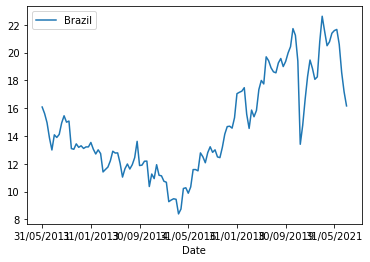

In [41]:
brazil.plot('Date', 'Brazil')